# box

Example boxplots with Formula 1 data from
https://ergast.com/mrd/db

In [1]:
%load_ext autoreload
%autoreload 2
%autosave 0

Autosave disabled


In [2]:
from etl import DATADIR, ErgastF1
from viz import Plot

In [3]:
f1 = ErgastF1(DATADIR / 'ergast/f1.zip')
plot = Plot()

## How long does a pitstop take?

In [4]:
stops = (
    f1.pit_stops
    .join(f1.races['season id_circuit'.split()], on='id_race')
    .join(f1.circuits['circuit'], on='id_circuit')
    .join(f1.drivers['driver'], on='id_driver')
    .set_index('season circuit driver stop'.split())
    ['duration']
)
stops

season  circuit                         driver              stop
2011    Albert Park Grand Prix Circuit  Jaime Alguersuari   1       26.898
                                        Michael Schumacher  1       25.021
                                        Mark Webber         1       23.426
                                        Fernando Alonso     1       23.251
                                        Felipe Massa        1       23.842
                                                                     ...  
2019    Yas Marina Circuit              Charles Leclerc     2       21.274
                                        Sebastian Vettel    2       21.858
                                        Daniil Kvyat        1       21.496
                                        Carlos Sainz        2       21.466
                                        Daniel Ricciardo    2       21.624
Name: duration, Length: 7436, dtype: float64

## box box box

In [5]:
def boxtracks(season):
    kw = dict()
    kw['xlim'] = (15, 35)
    kw['title'] = f"pit stop duration ({season})"
    data = stops.xs(season).unstack('circuit')
    plot.boxh(data, **kw)

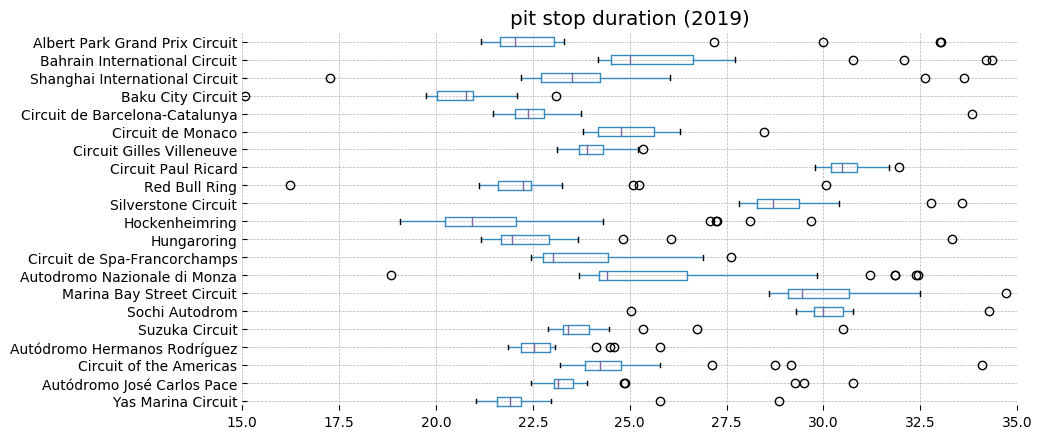

In [6]:
boxtracks(2019)

## paul ralentit
The pit lane of Circuit Paul Ricard was modified in 2019. Did it make a difference?

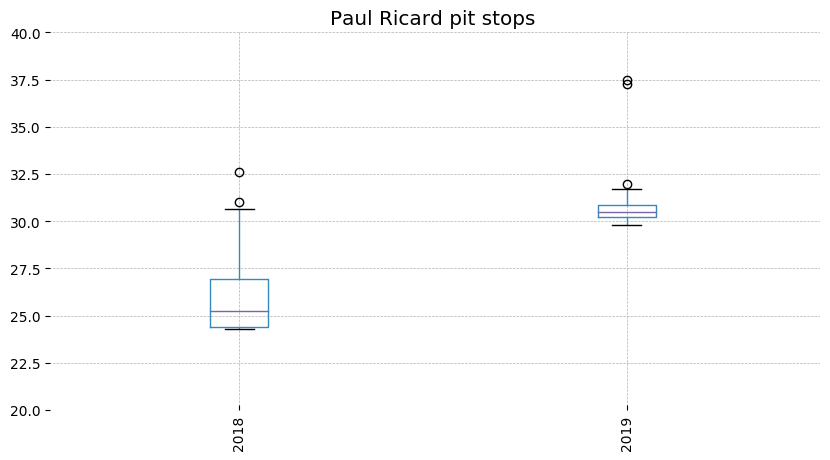

In [7]:
kw = dict()
kw['ylim'] = (20, 40)
kw['title'] = "Paul Ricard pit stops"
data = stops.xs('Circuit Paul Ricard', level=1).unstack('season')
plot.box(data, **kw)